In [1]:
import numpy as np

male_run_data = []
female_run_data = []
key_list = ['speed', 'gender', 'sport', 'userId', 'heart_rate', 'timestamp', 'id', 'altitude']

data = np.load('processed_endomondoHR_proper_interpolate.npy', allow_pickle=True)[0]
male_run_list=[]
female_run_list = []
for i in range (len(data)):
    if data[i]["sport"]=="run" and data[i]["gender"]=="male":
        del data[i]["longitude"]
        del data[i]["latitude"]
        del data[i]["since_last"]
        del data[i]["since_begin"]
        male_run_list.append(data[i])
    elif data[i]["sport"]=="run" and data[i]["gender"]=="female":
        del data[i]["longitude"]
        del data[i]["latitude"]
        del data[i]["since_last"]
        del data[i]["since_begin"]
        female_run_list.append(data[i])

male_run_list=np.array(male_run_list)
female_run_list = np.array(female_run_list)
np.save("male_run_data_with_proper_interpolate.npy",male_run_list)
np.save("female_run_data_with_proper_interpolate.npy",female_run_list)

In [2]:
import Histograms
import matplotlib.pyplot as plt

In [3]:
male_run_data = np.load('male_run_data_with_proper_interpolate.npy', allow_pickle=True)
female_run_data = np.load('female_run_data_with_proper_interpolate.npy', allow_pickle=True)

In [4]:
female_speeds_to_hr = {'<10':[], '10-12':[], '12-14':[], '14-16':[], '>16': []}
male_speeds_to_hr = {'<10':[], '10-12':[], '12-14':[], '14-16':[], '>16': []}
for workout in male_run_data:

    speed_data = workout['tar_derived_speed'][int(len(workout['tar_derived_speed'])*.1) : int(len(workout['tar_derived_speed'])*.9)]
    heart_data = workout['tar_heart_rate'][int(len(workout['tar_heart_rate']) * .1): int(len(workout['tar_heart_rate']) * .9)]
    max_speed = max(speed_data)
    max_heart_rate = max(heart_data)
    if max_speed < 10:
        male_speeds_to_hr['<10'].append(max_heart_rate)
    elif max_speed < 12:
        male_speeds_to_hr['10-12'].append(max_heart_rate)
    elif max_speed < 14:
        male_speeds_to_hr['12-14'].append(max_heart_rate)
    elif max_speed < 16:
        male_speeds_to_hr['14-16'].append(max_heart_rate)
    else:
        male_speeds_to_hr['>16'].append(max_heart_rate)

for workout in female_run_data:

    speed_data = workout['tar_derived_speed'][int(len(workout['tar_derived_speed'])*.1) : int(len(workout['tar_derived_speed'])*.9)]
    heart_data = workout['tar_heart_rate'][int(len(workout['tar_heart_rate']) * .1): int(len(workout['tar_heart_rate']) * .9)]
    max_speed = max(speed_data)
    max_heart_rate = max(heart_data)
    if max_speed < 10:
        female_speeds_to_hr['<10'].append(max_heart_rate)
    elif max_speed < 12:
        female_speeds_to_hr['10-12'].append(max_heart_rate)
    elif max_speed < 14:
        female_speeds_to_hr['12-14'].append(max_heart_rate)
    elif max_speed < 16:
        female_speeds_to_hr['14-16'].append(max_heart_rate)
    else:
        female_speeds_to_hr['>16'].append(max_heart_rate)

def plot_multiple_histograms(speeds_to_hr, gender):
    num_plots = min(len(speeds_to_hr), 5)  # Limit to 5 subplots max
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns layout

    axes = axes.flatten()  # Flatten to 1D array for easy iteration

    for i, (speed, hr_data) in enumerate(speeds_to_hr.items()):
        if i >= 5:  # Only plot up to 5 histograms
            break
        hr_data = np.array(hr_data)  # Convert to NumPy array
        Histograms.meanHistograms(axes[i], hr_data, f"{speed} km/h")

    # Hide any unused subplots if there are fewer than 5 datasets
    for j in range(i + 1, 6):
        fig.delaxes(axes[j])
    plt.suptitle(f"{gender} speed to Heart Rate")
    plt.tight_layout()
    plt.show()


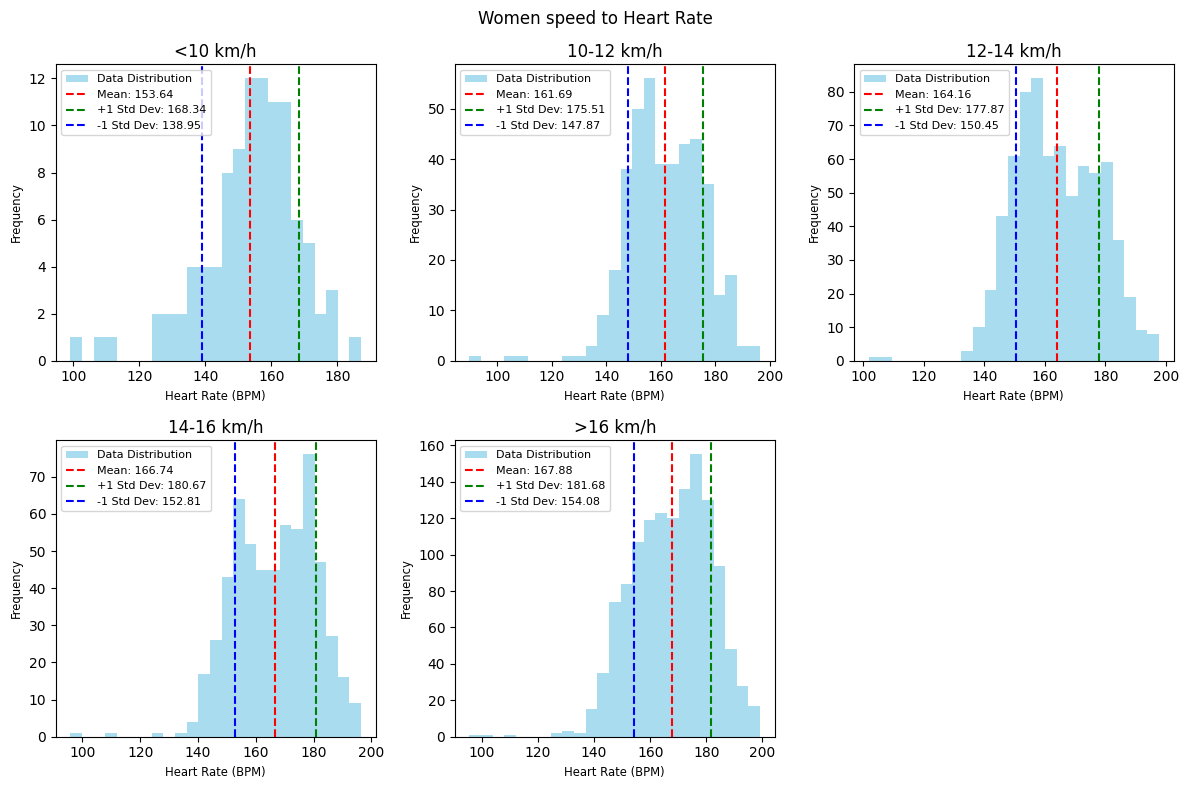

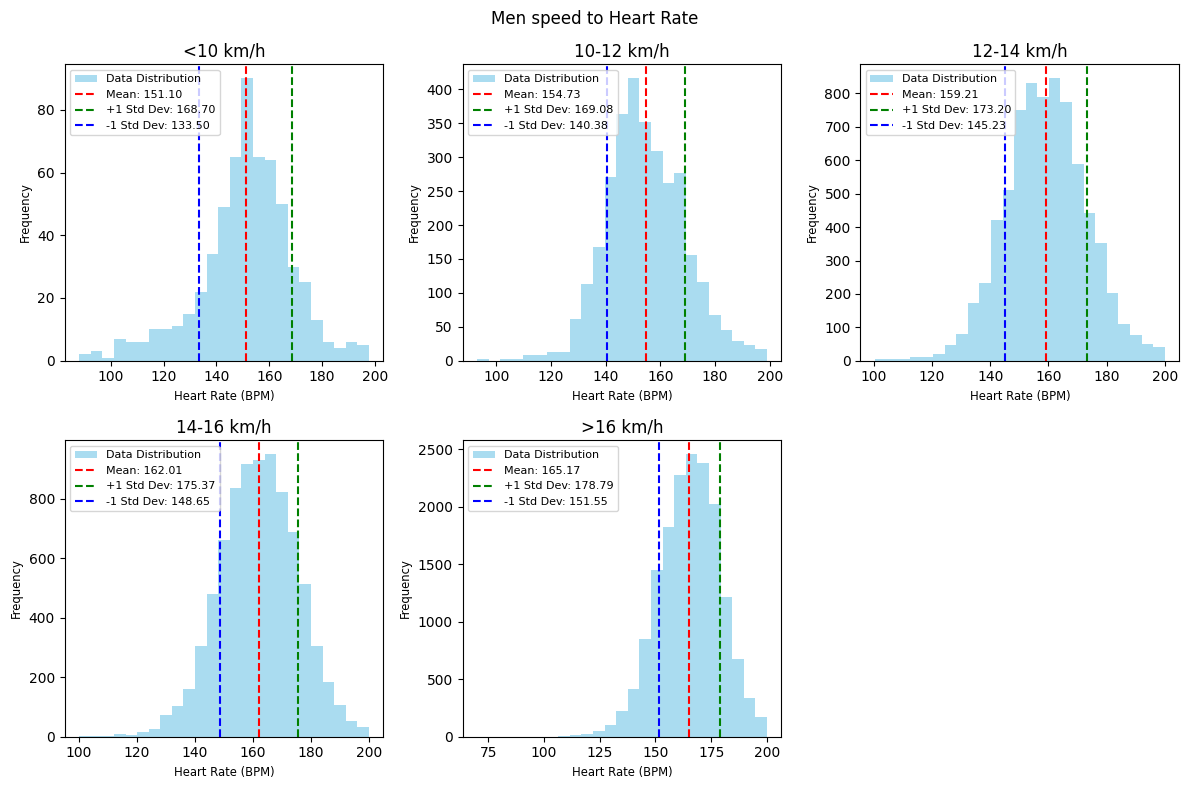

In [5]:

plot_multiple_histograms(female_speeds_to_hr, "Women")
plot_multiple_histograms(male_speeds_to_hr, "Men")

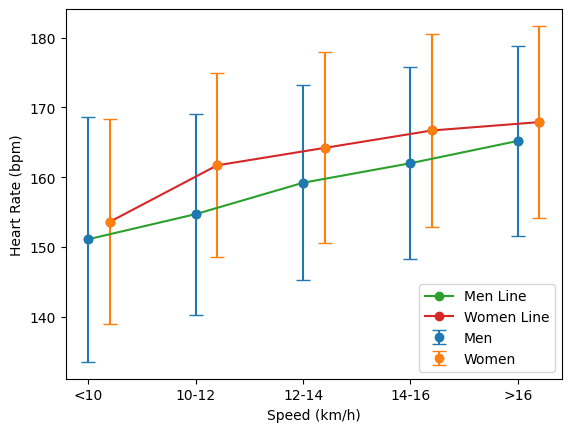

In [6]:
Speed = np.array(['<10', '10-12', '12-14', '14-16', '>16'])
x_positions = np.arange(len(Speed))  # Convert categorical labels to numerical positions

heart_rate_men = np.array([[151.1, 17.6], [154.7, 14.4], [159.2, 14.0], [162.0, 13.8], [165.2, 13.6]])
heart_rate_women = np.array([[153.6, 14.7], [161.7, 13.2], [164.2, 13.7], [166.7, 13.9], [167.9, 13.8]])

# Plot error bars
plt.errorbar(x_positions, heart_rate_men[:, 0], yerr=heart_rate_men[:, 1], label='Men', fmt='o', capsize=5)
plt.errorbar(x_positions + 0.2, heart_rate_women[:, 0], yerr=heart_rate_women[:, 1], label='Women', fmt='o', capsize=5)

# Connect the means with lines
plt.plot(x_positions, heart_rate_men[:, 0], linestyle='-', marker='o', label="Men Line")
plt.plot(x_positions + 0.2, heart_rate_women[:, 0], linestyle='-', marker='o', label="Women Line")

# Set x-ticks back to categorical labels
plt.xticks(x_positions, Speed)
plt.xlabel('Speed (km/h)')
plt.ylabel('Heart Rate (bpm)')
plt.legend()
plt.show()